# Feature Engineering & Feature Selection

Датасет https://archive.ics.uci.edu/ml/datasets/IDA2016Challenge

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tqdm import notebook

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [3]:
df_train = pd.read_csv('to_uci/aps_failure_training_set.csv', skiprows=20, na_values=['na'])
df_test = pd.read_csv('to_uci/aps_failure_test_set.csv', skiprows=20, na_values=['na'])

In [4]:
print(f'Размер выборки: {df_train.shape}')
df_train

Размер выборки: (60000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.00,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.00,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,130

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


### Распределение целевой переменной

In [5]:
df_train['class'].value_counts(normalize=True)

neg    0.983333
pos    0.016667
Name: class, dtype: float64

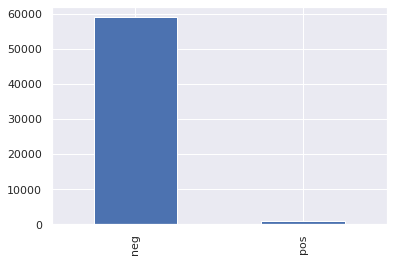

In [6]:
df_train['class'].value_counts().plot.bar();

### Попробуем удалить пропущенные значения

In [5]:
df_train = df_train.dropna()
df_test = df_test.dropna()
df_train.shape

(591, 171)

#### Несколько распределений

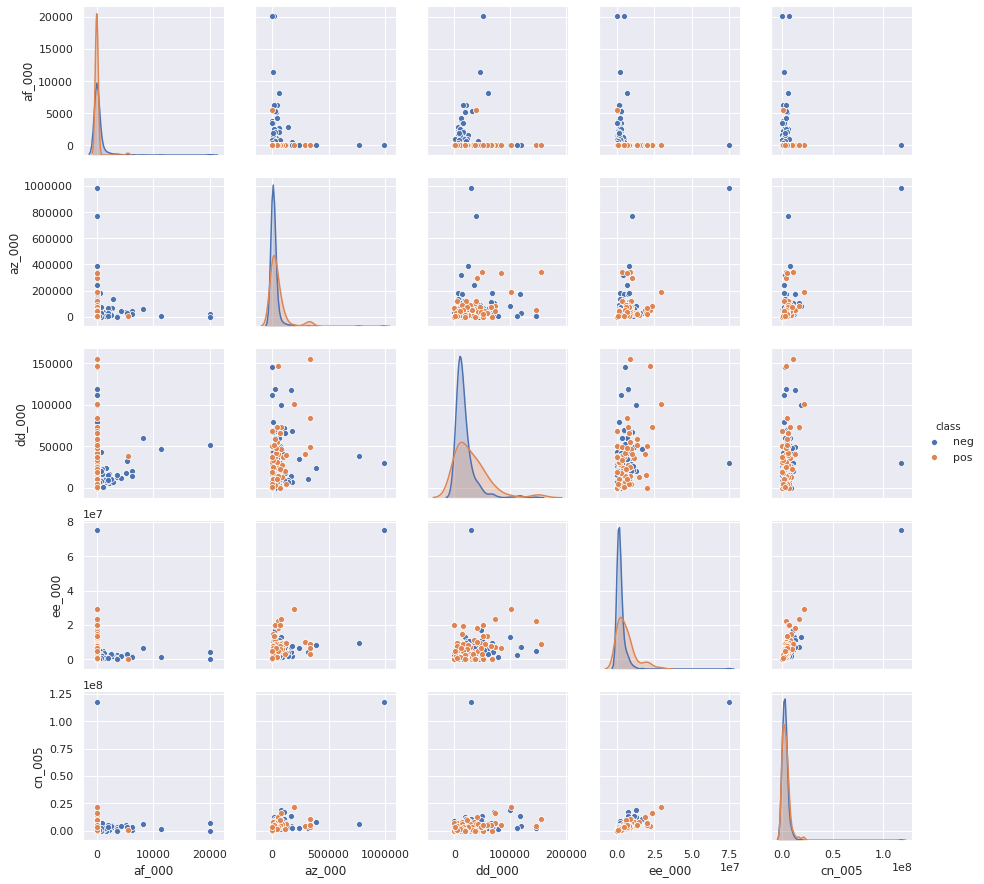

In [8]:
sns.pairplot(df_train[['class', 'af_000', 'az_000', 'dd_000', 'ee_000', 'cn_005']], hue='class');

In [6]:
X_train = df_train.drop('class', axis=1).values
y_train = df_train['class'].apply(lambda x: 1 if x == 'neg' else 0).values
X_test = df_test.drop('class', axis=1).values
y_test = df_test['class'].apply(lambda x: 1 if x == 'neg' else 0).values

In [7]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### KNN GridSearch без NaN

In [8]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 30)}
grid = GridSearchCV(knn, param_grid=param_grid, cv=5, n_jobs=-1)

for _ in notebook.tqdm(range(30)):
    grid.fit(X_train, y_train)

In [9]:
print(f'Best k: {grid.best_params_["n_neighbors"]}')
print(f'Best score: {grid.best_score_:.2f}')

Best k: 4
Best score: 0.93


In [10]:
def get_metrics(y_pred, y_true):
    quality = []
    metrics = [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]
    print('=== Quality Report ===')
    for metric in metrics:
        current_metric_value = metric(y_pred, y_true)
        quality.append(current_metric_value)
        print(f'{metric.__name__.capitalize()}: {current_metric_value:.2f}')
    print('======================')
    return quality

In [11]:
predict = grid.predict(X_test)

columns = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC']
index = ['KNN без NaN']
quality_df = pd.DataFrame([get_metrics(y_test, predict)], columns=columns, index=index)

=== Quality Report ===
Accuracy_score: 0.91
Precision_score: 0.92
Recall_score: 0.97
F1_score: 0.95
Roc_auc_score: 0.80


### Logistic Regression без NaN

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

quality_df.loc['Logistic Regression без NaN', :] = get_metrics(y_test, predict)
quality_df

=== Quality Report ===
Accuracy_score: 0.96
Precision_score: 0.95
Recall_score: 1.00
F1_score: 0.97
Roc_auc_score: 0.88


,Accuracy,Precision,Recall,F1,ROC-AUC
KNN без NaN,0.909091,0.922535,0.97037,0.945848,0.801852
Logistic Regression без NaN,0.957576,0.950704,1.00000,0.974729,0.883333


### Logistic Regression с регуляризацией без NaN

In [13]:
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)
predict = model.predict(X_test)

quality_df.loc['Logistic Regression l2 без NaN', :] = get_metrics(y_test, predict)
quality_df

=== Quality Report ===
Accuracy_score: 0.96
Precision_score: 0.95
Recall_score: 1.00
F1_score: 0.97
Roc_auc_score: 0.88


,Accuracy,Precision,Recall,F1,ROC-AUC
KNN без NaN,0.909091,0.922535,0.97037,0.945848,0.801852
Logistic Regression без NaN,0.957576,0.950704,1.00000,0.974729,0.883333
Logistic Regression l2 без NaN,0.957576,0.950704,1.00000,0.974729,0.883333


### Пропущенных значений очень много, попробуем поработать с ними

In [14]:
df_train = pd.read_csv('to_uci/aps_failure_training_set.csv', skiprows=20, na_values=['na'])
df_test = pd.read_csv('to_uci/aps_failure_test_set.csv', skiprows=20, na_values=['na'])

#### Признаки с большим количеством отсутствующих значений, в процентах

In [15]:
pct_missing_value = df_train.isnull().sum()/df_train.shape[0]*100
pct_missing_value.sort_values(ascending=False)[:20]

br_000    82.106667
bq_000    81.203333
bp_000    79.566667
bo_000    77.221667
cr_000    77.215000
ab_000    77.215000
bn_000    73.348333
bm_000    65.915000
bl_000    45.461667
bk_000    38.390000
cf_000    24.768333
co_000    24.768333
cg_000    24.768333
ch_000    24.768333
ad_000    24.768333
cx_000    23.013333
ct_000    23.013333
cv_000    23.013333
cu_000    23.013333
cy_000    23.013333
dtype: float64

- **Заменим отсутствующие значения медианой**

In [16]:
df_train = df_train.fillna(df_train.median())
df_test = df_test.fillna(df_test.median())

### Logistic Regression с медианой вместо NaN

In [17]:
X_train = df_train.drop('class', axis=1).values
y_train = df_train['class'].apply(lambda x: 1 if x == 'neg' else 0).values
X_test = df_test.drop('class', axis=1).values
y_test = df_test['class'].apply(lambda x: 1 if x == 'neg' else 0).values

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
predict = model.predict(X_test)

quality_df.loc['Logistic Regression с медианой', :] = get_metrics(y_test, predict)
quality_df

=== Quality Report ===
Accuracy_score: 0.99
Precision_score: 0.99
Recall_score: 1.00
F1_score: 0.99
Roc_auc_score: 0.77


,Accuracy,Precision,Recall,F1,ROC-AUC
KNN без NaN,0.909091,0.922535,0.970370,0.945848,0.801852
Logistic Regression без NaN,0.957576,0.950704,1.000000,0.974729,0.883333
Logistic Regression l2 без NaN,0.957576,0.950704,1.000000,0.974729,0.883333
Logistic Regression с медианой,0.986750,0.989022,0.997504,0.993245,0.768085


### Logistic Regression с модой вместо NaN

In [20]:
df_train = pd.read_csv('to_uci/aps_failure_training_set.csv', skiprows=20, na_values=['na'])
df_test = pd.read_csv('to_uci/aps_failure_test_set.csv', skiprows=20, na_values=['na'])

In [21]:
df_train = df_train.fillna(df_train.mode().iloc[0])
df_test = df_test.fillna(df_test.mode().iloc[0])

In [22]:
X_train = df_train.drop('class', axis=1).values
y_train = df_train['class'].apply(lambda x: 1 if x == 'neg' else 0).values
X_test = df_test.drop('class', axis=1).values
y_test = df_test['class'].apply(lambda x: 1 if x == 'neg' else 0).values

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

quality_df.loc['Logistic Regression с модой', :] = get_metrics(y_test, predict)

=== Quality Report ===
Accuracy_score: 0.99
Precision_score: 0.99
Recall_score: 1.00
F1_score: 0.99
Roc_auc_score: 0.77


In [23]:
quality_df

,Accuracy,Precision,Recall,F1,ROC-AUC
KNN без NaN,0.909091,0.922535,0.970370,0.945848,0.801852
Logistic Regression без NaN,0.957576,0.950704,1.000000,0.974729,0.883333
Logistic Regression l2 без NaN,0.957576,0.950704,1.000000,0.974729,0.883333
Logistic Regression с медианой,0.986750,0.989022,0.997504,0.993245,0.768085
Logistic Regression с модой,0.987125,0.989026,0.997888,0.993437,0.768277


### Удалим скоррелированные признаки

In [24]:
df_train = pd.read_csv('to_uci/aps_failure_training_set.csv', skiprows=20, na_values=['na'])
df_test = pd.read_csv('to_uci/aps_failure_test_set.csv', skiprows=20, na_values=['na'])

In [25]:
def corr_feature_detect(data, threshold=0.8):
    
    corrmat = data.drop(['class'], axis=1).corr()

    corrmat = corrmat.abs().unstack().sort_values(ascending=False)

    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1]

    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    correlated_feats = []

    for row in corrmat.values:
        f1, f2, corr_value = row

        if not ((f1 in correlated_feats) | (f2 in correlated_feats)):
            f1_feat_len = corrmat[(corrmat.feature1==f1) | (corrmat.feature2==f1)].shape[0]
            f2_feat_len = corrmat[(corrmat.feature1==f2) | (corrmat.feature2==f2)].shape[0]

            if f1_feat_len >= f2_feat_len:
                correlated_feats.append(f1)
            else:
                correlated_feats.append(f2)
    
    return correlated_feats

In [26]:
corr_features = corr_feature_detect(df_train, threshold=0.9)
print(corr_features)

['bb_000', 'ah_000', 'bv_000', 'bt_000', 'bu_000', 'cf_000', 'co_000', 'cc_000', 'am_0', 'an_000', 'br_000', 'cq_000', 'bq_000', 'bo_000', 'bh_000', 'bg_000', 'ds_000', 'dn_000', 'ba_004', 'aa_000', 'ba_003', 'ed_000', 'cn_005', 'ee_003', 'aq_000', 'bn_000', 'cv_000', 'ap_000', 'do_000', 'by_000', 'ba_002', 'cn_004', 'ak_000', 'bm_000', 'ao_000', 'cs_003', 'ba_001', 'ee_001', 'ba_005']


In [75]:
corr_features.__len__()

39

In [27]:
df_train = df_train.drop(corr_features, axis=1)
df_test = df_test.drop(corr_features, axis=1)

### Без сильно скоррелированных признаков, медиана вместо NaN

In [30]:
df_train = df_train.fillna(df_train.median())
df_test = df_test.fillna(df_test.median())

In [31]:
X_train = df_train.drop('class', axis=1).values
y_train = df_train['class'].apply(lambda x: 1 if x == 'neg' else 0).values
X_test = df_test.drop('class', axis=1).values
y_test = df_test['class'].apply(lambda x: 1 if x == 'neg' else 0).values

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

quality_df.loc['Logistic Regression без скорелированных фичей с медианой', :] = get_metrics(y_test, predict)

=== Quality Report ===
Accuracy_score: 0.99
Precision_score: 0.99
Recall_score: 1.00
F1_score: 0.99
Roc_auc_score: 0.75


### Без сильно скоррелированных признаков, мода вместо NaN

In [33]:
df_train = pd.read_csv('to_uci/aps_failure_training_set.csv', skiprows=20, na_values=['na'])
df_test = pd.read_csv('to_uci/aps_failure_test_set.csv', skiprows=20, na_values=['na'])

In [34]:
df_train = df_train.drop(corr_features, axis=1)
df_test = df_test.drop(corr_features, axis=1)

In [35]:
df_train = df_train.fillna(df_train.mode().iloc[0])
df_test = df_test.fillna(df_test.mode().iloc[0])

In [36]:
X_train = df_train.drop('class', axis=1).values
y_train = df_train['class'].apply(lambda x: 1 if x == 'neg' else 0).values
X_test = df_test.drop('class', axis=1).values
y_test = df_test['class'].apply(lambda x: 1 if x == 'neg' else 0).values

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

quality_df.loc['Logistic Regression без скорелированных фичей с модой', :] = get_metrics(y_test, predict)

=== Quality Report ===
Accuracy_score: 0.99
Precision_score: 0.99
Recall_score: 1.00
F1_score: 0.99
Roc_auc_score: 0.75


### Итоговые метрики 

In [37]:
quality_df

,Accuracy,Precision,Recall,F1,ROC-AUC
KNN без NaN,0.909091,0.922535,0.970370,0.945848,0.801852
Logistic Regression без NaN,0.957576,0.950704,1.000000,0.974729,0.883333
Logistic Regression l2 без NaN,0.957576,0.950704,1.000000,0.974729,0.883333
Logistic Regression с медианой,0.986750,0.989022,0.997504,0.993245,0.768085
Logistic Regression с модой,0.987125,0.989026,0.997888,0.993437,0.768277
Logistic Regression без скорелированных фичей с медианой,0.986000,0.988270,0.997504,0.992865,0.752085
Logistic Regression без скорелированных фичей с модой,0.986437,0.988213,0.998016,0.993090,0.751008


На метриках `Accuracy, Precision, Recall, F1` лучше всего показывает себя **логистическая регрессия**
на датасете с замененными отсутствующими значениями на моду. Лучшее значение `ROC-AUC` показывает **логистическая регрессия** на датасете с удаленными значениями.